# Upre Vinod, DS20SEP03, prabhasbablu123@gmail.com

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("D:/New folder/GooglePlaystore.csv")

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape

(10841, 13)

In [5]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [6]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
df.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


# Data clean up – Missing value treatment

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [9]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

<AxesSubplot:>

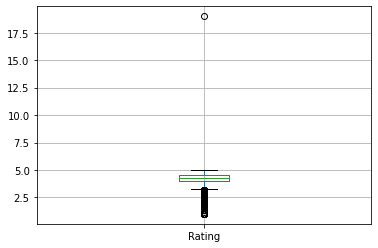

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
df.boxplot('Rating')

a. Drop records where rating is missing since rating is our target/study variable

In [11]:
df[df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
df.drop([10472],inplace=True)

<AxesSubplot:>

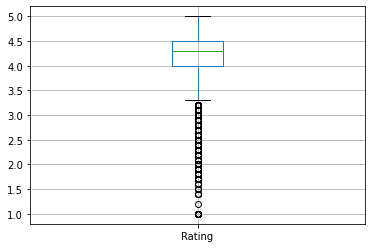

In [13]:
df.boxplot('Rating')

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

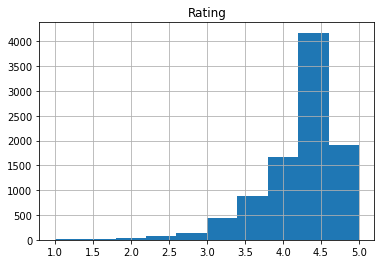

In [14]:
df.hist('Rating')

In [15]:
#Drop records where rating is missing since rating is our target/study variable
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [16]:
df.dropna(axis=0,subset=['Rating'],inplace=True)

b. Check the null values for the Android Ver column.
i. Are all 3 records having the same problem?
ii. Drop the 3rd record i.e. record for “Life Made WIFI ...”
iii. Replace remaining missing values with the mode

c. Current ver – replace with most common value

In [17]:
df['Current Ver'].fillna(str(df['Current Ver'].mode().values[0]), inplace=True)
df['Android Ver'].fillna(str(df['Android Ver'].mode().values[0]), inplace=True)

In [18]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# correcting the datatypes

In [19]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<AxesSubplot:xlabel='Type', ylabel='Price'>

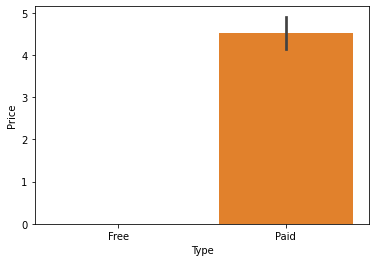

In [82]:
sns.barplot(x='Type',y='Price',data=df)

In [86]:
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.104691,0.077155,0.126633,0.024729
Reviews,0.104691,1.000000,0.205680,0.630588,-0.035359
Size,0.077155,0.205680,1.000000,0.187529,-0.010095
Installs,0.126633,0.630588,0.187529,1.000000,-0.065985
Price,0.024729,-0.035359,-0.010095,-0.065985,1.000000


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [20]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [21]:
#price,installs,Reviews these are the columns we have to conver in numeric
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))

In [22]:
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x: float(x))

In [23]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [24]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [25]:
df['Rating'].value_counts()

4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
4.1     708
4.0     568
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      64
2.9      45
2.8      42
2.6      25
2.7      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
2.1       8
1.8       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

In [26]:
df['Installs'].value_counts()

1.000000e+06    1577
1.000000e+07    1252
1.000000e+05    1150
1.000000e+04    1010
5.000000e+06     752
1.000000e+03     713
5.000000e+05     538
5.000000e+04     467
5.000000e+03     432
1.000000e+08     409
1.000000e+02     309
5.000000e+07     289
5.000000e+02     201
5.000000e+08      72
1.000000e+01      69
1.000000e+09      58
5.000000e+01      56
5.000000e+00       9
1.000000e+00       3
Name: Installs, dtype: int64

In [27]:
df[df.Reviews>df.Installs].index

Int64Index([2454, 4663, 5917, 6700, 7402, 8591, 10697], dtype='int64')

In [28]:
df.drop([2454, 4663, 5917, 6700, 7402, 8591, 10697],inplace=True)

# Identify and handle outliers 

<AxesSubplot:>

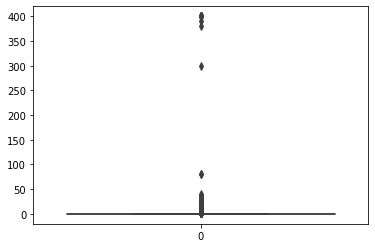

In [29]:
#price column
import seaborn as sns
sns.boxplot(data=df['Price'])

In [30]:
df.drop(df[df.Price>200].index,axis=0,inplace=True)

In [31]:
df.shape

(9344, 13)

In [32]:
df[df.Price>30].index

Int64Index([2253, 2301, 2365, 2402, 2414, 5360], dtype='int64')

<AxesSubplot:>

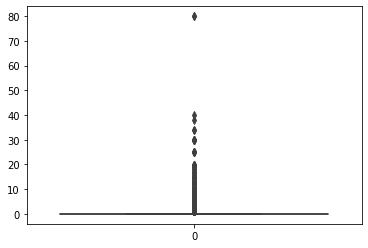

In [33]:
sns.boxplot(data=df['Price'])

In [34]:
df.drop(df[df.Price>30].index,axis=0,inplace=True)

<AxesSubplot:>

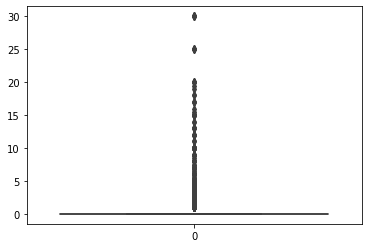

In [35]:
sns.boxplot(data=df['Price'])

C:\Users\vikas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

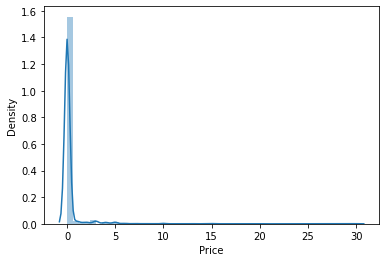

In [36]:
sns.distplot(df['Price'])

<AxesSubplot:>

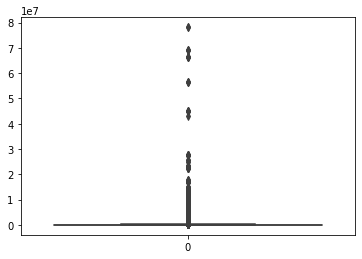

In [37]:
##Reviews column
sns.boxplot(data=df['Reviews'])

C:\Users\vikas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Reviews', ylabel='Density'>

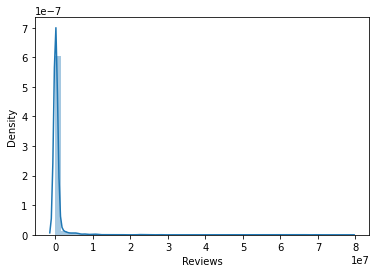

In [38]:
sns.distplot(df['Reviews'])

In [39]:
df1=df[df.Reviews<1000000]

In [40]:
df1.shape

(8634, 13)

In [41]:
##Installs column
df['Installs'].describe()

count    9.338000e+03
mean     1.795108e+07
std      9.136965e+07
min      5.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [42]:
np.percentile(df['Installs'],95)

100000000.0

In [43]:
for i in range(0,101,1):
    print(' The {} percentile of installs is {} '.format(i,np.percentile(df['Installs'],i)))

 The 0 percentile of installs is 5.0 
 The 1 percentile of installs is 50.0 
 The 2 percentile of installs is 100.0 
 The 3 percentile of installs is 100.0 
 The 4 percentile of installs is 100.0 
 The 5 percentile of installs is 500.0 
 The 6 percentile of installs is 500.0 
 The 7 percentile of installs is 1000.0 
 The 8 percentile of installs is 1000.0 
 The 9 percentile of installs is 1000.0 
 The 10 percentile of installs is 1000.0 
 The 11 percentile of installs is 1000.0 
 The 12 percentile of installs is 1000.0 
 The 13 percentile of installs is 1000.0 
 The 14 percentile of installs is 1000.0 
 The 15 percentile of installs is 5000.0 
 The 16 percentile of installs is 5000.0 
 The 17 percentile of installs is 5000.0 
 The 18 percentile of installs is 5000.0 
 The 19 percentile of installs is 10000.0 
 The 20 percentile of installs is 10000.0 
 The 21 percentile of installs is 10000.0 
 The 22 percentile of installs is 10000.0 
 The 23 percentile of installs is 10000.0 
 The 24

In [44]:
df[df.Installs>np.percentile(df['Installs'],95)].index

Int64Index([ 152,  335,  336,  338,  340,  341,  342,  347,  371,  378,
            ...
            4222, 4234, 4365, 4566, 4676, 5395, 5596, 5856, 7536, 9844],
           dtype='int64', length=130)

In [45]:
df.drop(df[df.Installs>np.percentile(df['Installs'],95)].index,axis=0,inplace=True)

In [46]:
df.shape

(9208, 13)

# Data Analysis to answer business questions

C:\Users\vikas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

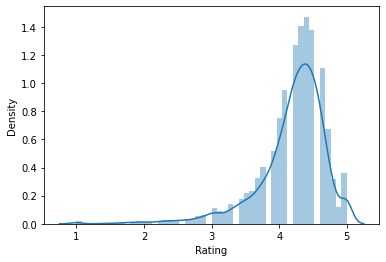

In [47]:
#5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?
#a. How do you explain this? ,b. What is the implication of this on your analysis?

sns.distplot(df['Rating'])

In [48]:
#The skewness is in negative direction so it is negatively skewed(left skewed)
print("The skewnes of this data distribution is",df['Rating'].skew())

The skewnes of this data distribution is -1.8425872652320243


In [49]:
#the data left skewed so the median of this distribution is > mean of the distribution
print('The Median of this distribution {} is greater than mean {} of this distribution'.
      format(df.Rating.median(),df.Rating.mean()))

The Median of this distribution 4.3 is greater than mean 4.190117289313644 of this distribution


In [50]:
#so the skewness between -1 to 1 it states data is highly skewed towards lower values

In [51]:
#6. What are the top Content Rating values?
  #a. Are there any values with very few records?
  #b. If yes, drop those as they won’t help in the analysis


df['Content Rating'].value_counts()

Everyone           7303
Teen               1055
Mature 17+          458
Everyone 10+        388
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [52]:
#Adults only 18+ and Unrated have very few records 4 only
#So we we can drop them

In [53]:
df[df['Content Rating'] == 'Adults only 18+'].index

Int64Index([298, 3043, 6424], dtype='int64')

In [54]:
df.drop(df[df['Content Rating'] == 'Adults only 18+'].index,axis=0,inplace=True)

In [55]:
df['Content Rating'].value_counts()

Everyone        7303
Teen            1055
Mature 17+       458
Everyone 10+     388
Unrated            1
Name: Content Rating, dtype: int64

In [56]:
df[df['Content Rating'] == 'Unrated'].index

Int64Index([8266], dtype='int64')

In [57]:
df.drop(df[df['Content Rating'] == 'Unrated'].index,axis=0,inplace=True)

In [58]:
df.shape

(9204, 13)

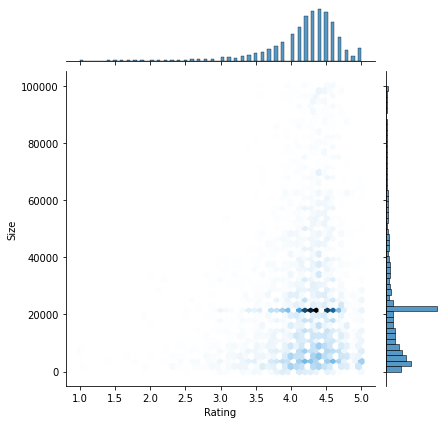

In [59]:
##7. Effect of size on rating
     #a. Make a joinplot to understand the effect of size on rating
     #b. Do you see any patterns?
     #c. How do you explain the pattern?
    
sns.jointplot(y='Size',x='Rating',data=df, kind='hex')    

In [60]:
#i dont think there is a relation between Size and Rating
# most of the concentration is in betwwen 4-4.5 in Rating
#and most of the app size is nearly 20MB

In [61]:
##8. Effect of price on rating
  #a. Make a jointplot (with regression line)
  #b. What pattern do you see?
  #c. How do you explain the pattern?
  #d. Replot the data, this time with only records with price > 0
  #e. Does the pattern change?
  #f. What is your overall inference on the effect of price on the rating

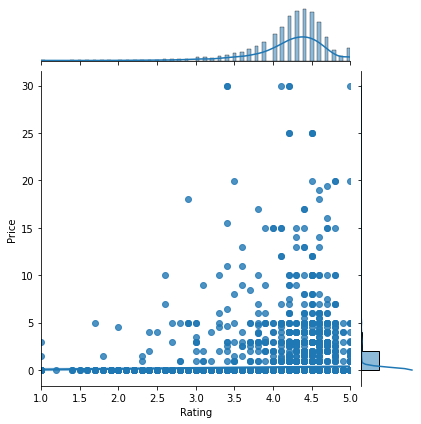

In [62]:
sns.jointplot(x='Rating',y='Price',data=df, kind='reg') 

In [63]:
#lot of apps have 0 price that means free apps
#lots of data spread around 0-5 in price 
#In this range we can find 1-5 rating
#the reg line is in completely horizontal passing trough 0, so we cant say there a relation between this two columns


In [64]:
df2 = df.loc[df.Price>0]

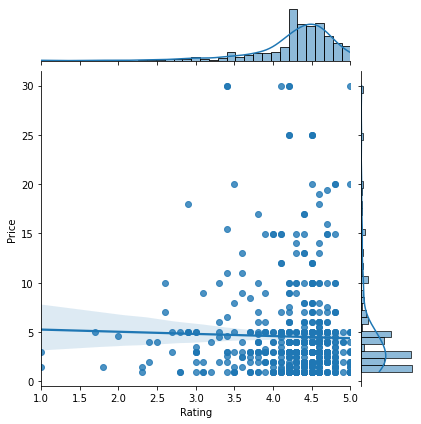

In [65]:
sns.jointplot(y='Price', x='Rating', data=df2, kind='reg')

In [66]:
#Generally increasing the Prices, doesn't have signifcant effect on Higher Rating. 
#For Higher Price, Rating is High and almost constant ie greater than 4
#we can see there is a slightly negative relation
#which apps have 0-5 in price they have great rating like 4-5
#There is some apps which have higher in price and also in rating
#But if we ignore the data that b/w 0-5 in price we can its positively related

In [67]:
##9. Look at all the numeric interactions together –
    #a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

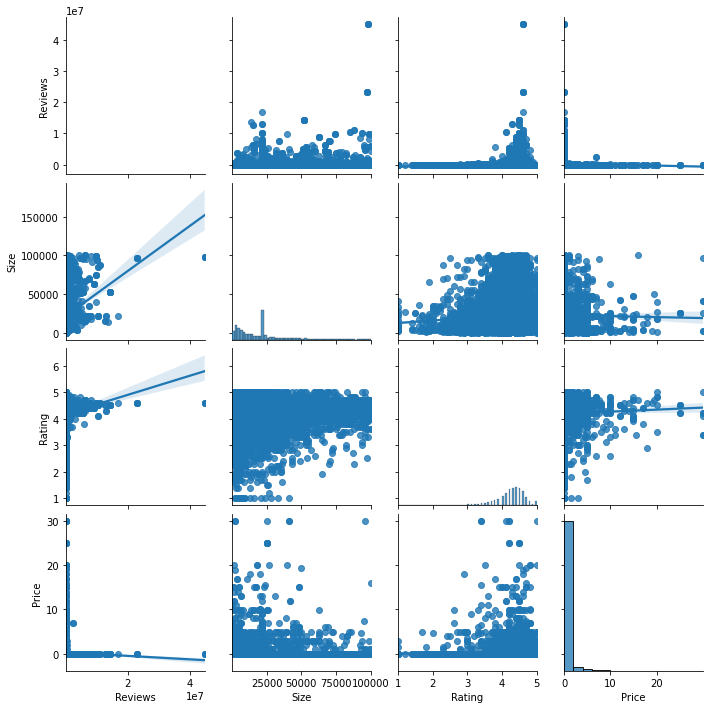

In [68]:
#sns.pairplot(df)
sns.pairplot(df,vars=['Reviews', 'Size', 'Rating', 'Price'],kind='reg')

In [69]:
#we can see that the Size and Reviews has best fit line with increasing direction

In [70]:
##10. Rating vs. content rating
   #a. Make a bar plot displaying the rating for each content rating
   #b. Which metric would you use? Mean? Median? Some other quantile?
   #c. Choose the right metric and plot

<AxesSubplot:xlabel='Content Rating'>

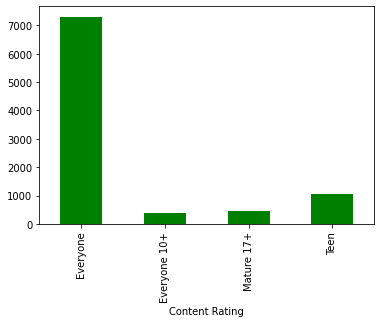

In [71]:
df.groupby(['Content Rating'])['Rating'].count().plot.bar(color="green")

<AxesSubplot:>

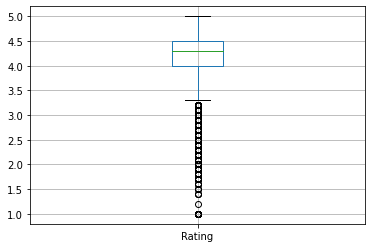

In [72]:
df.boxplot('Rating')

In [73]:
#there is too much outliers below min value
#we must use Median to get rid of the outliers


<AxesSubplot:xlabel='Content Rating'>

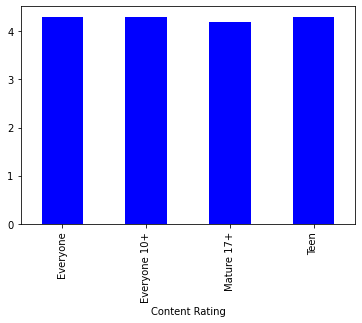

In [74]:
df.groupby(['Content Rating'])['Rating'].median().plot.bar(color="blue")

In [75]:
##11. Content rating vs. size vs. rating – 3 variables at a time
     #a. Create 5 buckets (20% records in each) based on Size
     #b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination
     #c. Make a heatmap of this i. Annotated ii. Greens color map
     #d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

In [76]:
bins=[0,20000,40000,60000,80000,100000]
df['size_buckets'] = pd.cut(df['Size'],bins,labels=['0-20mb','20mb-40mb','40mb-60mb','60mb-80mb','80mb-100mb'])

In [77]:
pivot=pd.pivot_table(df, values='Rating', index='size_buckets', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))

In [78]:
pivot

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
size_buckets,,,,
0-20mb,3.8,4.02,3.5,3.9
20mb-40mb,4.0,4.00,4.0,4.0
40mb-60mb,3.9,4.10,4.1,4.0
60mb-80mb,4.0,4.20,4.0,4.0
80mb-100mb,4.1,4.30,4.0,4.1


<AxesSubplot:xlabel='Content Rating', ylabel='size_buckets'>

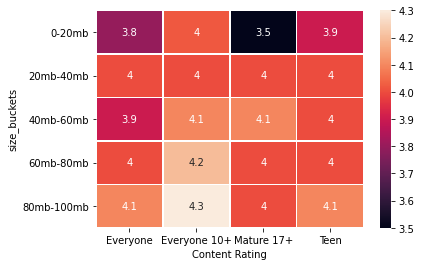

In [79]:
sns.heatmap(pivot, annot=True, linewidths=.5)

<AxesSubplot:xlabel='Content Rating', ylabel='size_buckets'>

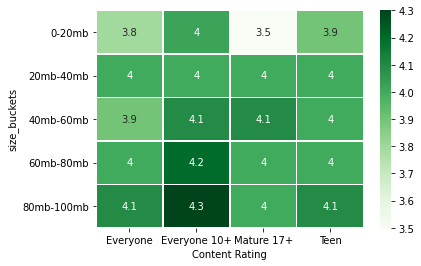

In [80]:
sns.heatmap(pivot, annot=True, linewidths=.5,cmap='Greens')

In [81]:
#I think lighter apps prefer in all categories
#Bcoz the distribution of data lies in free apps and 0 size with rating4-5
#But nowadays games are very popular so that we can say larger apps also getting top ratings
#we can say that gaming apps like free fire ,pubg with larger size,they are getting top ratings
#but over all lighter apps prefered most us

# THANK YOU BOARD INFINITY AND THANKS TO PUNITH SIR